# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

+ crim:   per capita crime rate by town.
+ zn:     proportion of residential land zoned for lots over 25,000 sq.ft.
+ indus:  proportion of non-retail business acres per town.
+ chas:   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
+ nox:    nitrogen oxides concentration (parts per 10 million).
+ rm:     average number of rooms per dwelling.
+ age:    proportion of owner-occupied units built prior to 1940.
+ dis:    weighted mean of distances to five Boston employment centres.
+ rad:    index of accessibility to radial highways.
+ tax:    full-value property-tax rate per 10000 Dollar.
+ ptratio pupil-teacher ratio by town.
+ black:  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
+ lstat:  lower status of the population (percent).
+ medv:   median value of owner-occupied homes in 10000 Dollars.

  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
print(df.shape)
df.info()

(333, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


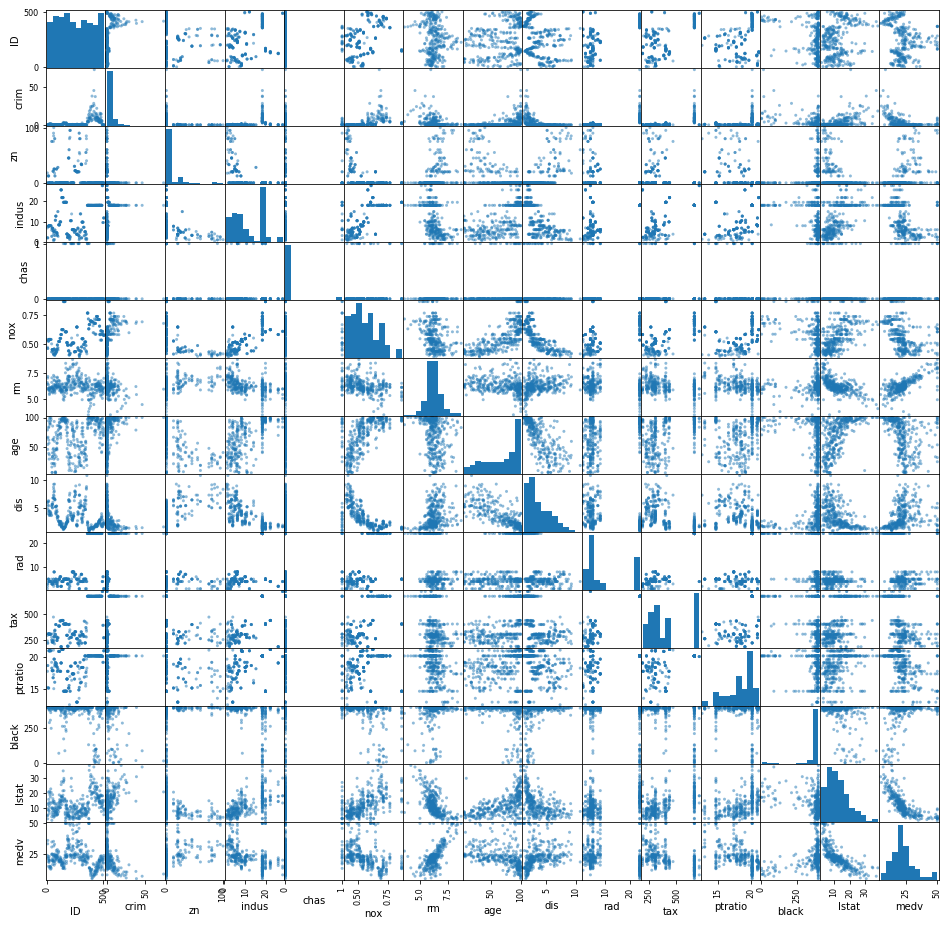

In [6]:
pd.plotting.scatter_matrix(df, figsize=(16,16));

Text(0, 0.5, 'Percent')

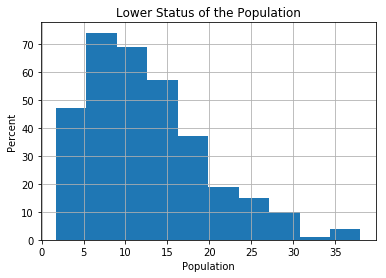

In [7]:
df.lstat.hist()
plt.title('Lower Status of the Population')
plt.xlabel('Population')
plt.ylabel('Percent')

Comment: Skewed left Distribution. Most of the population seems in the lower status category

Text(0, 0.5, 'Percent')

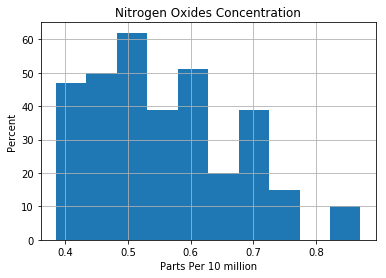

In [8]:
df.nox.hist()
plt.title('Nitrogen Oxides Concentration')
plt.xlabel('Parts Per 10 million')
plt.ylabel('Percent')

Comment: Skewed left Distribution. With high and lows. And an outliers at about 0.9 (maybe). 

Text(0, 0.5, 'Teacher')

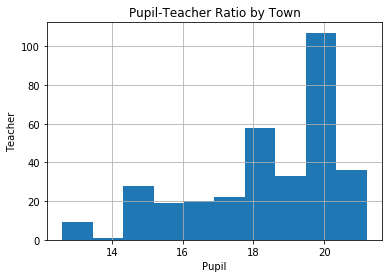

In [9]:
df.ptratio.hist()
plt.title('Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil')
plt.ylabel('Teacher')

Comment: Skewed right Distribution. Most teachers have about 20 pupils. (if I got that right)

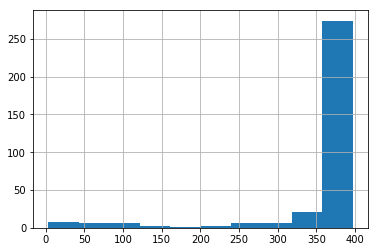

In [10]:
df.black.hist()

In [11]:
df.black.max()

396.9

In [12]:
df.black.mean()

359.4660960960962

In [13]:
df.black.std()

86.58456685718396

## Subsets

In [14]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [15]:
print(df['chas'].sum())

20


In [16]:
crim = df.loc[df['crim'] > 1.0]
print(crim)

      ID      crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
11    17   1.05393  0.0   8.14     0  0.538  5.935   29.3  4.4986    4  307   
13    21   1.25179  0.0   8.14     0  0.538  5.570   98.1  3.7979    4  307   
15    23   1.23247  0.0   8.14     0  0.538  6.142   91.7  3.9769    4  307   
18    31   1.13081  0.0   8.14     0  0.538  5.713   94.1  4.2330    4  307   
19    32   1.35472  0.0   8.14     0  0.538  6.072  100.0  4.1750    4  307   
20    35   1.61282  0.0   8.14     0  0.538  6.096   96.9  3.7598    4  307   
89   132   1.19294  0.0  21.89     0  0.624  6.326   97.7  2.2710    4  437   
96   142   1.62864  0.0  21.89     0  0.624  5.019  100.0  1.4394    4  437   
97   143   3.32105  0.0  19.58     1  0.871  5.403  100.0  1.3216    5  403   
98   146   2.37934  0.0  19.58     0  0.871  6.130  100.0  1.4191    5  403   
99   148   2.36862  0.0  19.58     0  0.871  4.926   95.7  1.4608    5  403   
100  149   2.33099  0.0  19.58     0  0.871  5.186  

In [17]:
df.iloc[305:321]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
305,467,3.77498,0.0,18.1,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
306,468,4.42228,0.0,18.1,0,0.584,6.003,94.5,2.5403,24,666,20.2,331.29,21.32,19.1
307,469,15.57570,0.0,18.1,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13,19.1
308,470,13.07510,0.0,18.1,0,0.580,5.713,56.7,2.8237,24,666,20.2,396.90,14.76,20.1
309,472,4.03841,0.0,18.1,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87,19.6
310,473,3.56868,0.0,18.1,0,0.580,6.437,75.0,2.8965,24,666,20.2,393.37,14.36,23.2
311,475,8.05579,0.0,18.1,0,0.584,5.427,95.4,2.4298,24,666,20.2,352.58,18.14,13.8
312,477,4.87141,0.0,18.1,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
313,478,15.02340,0.0,18.1,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
314,479,10.23300,0.0,18.1,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6


Comment: Narrowing in on high crime

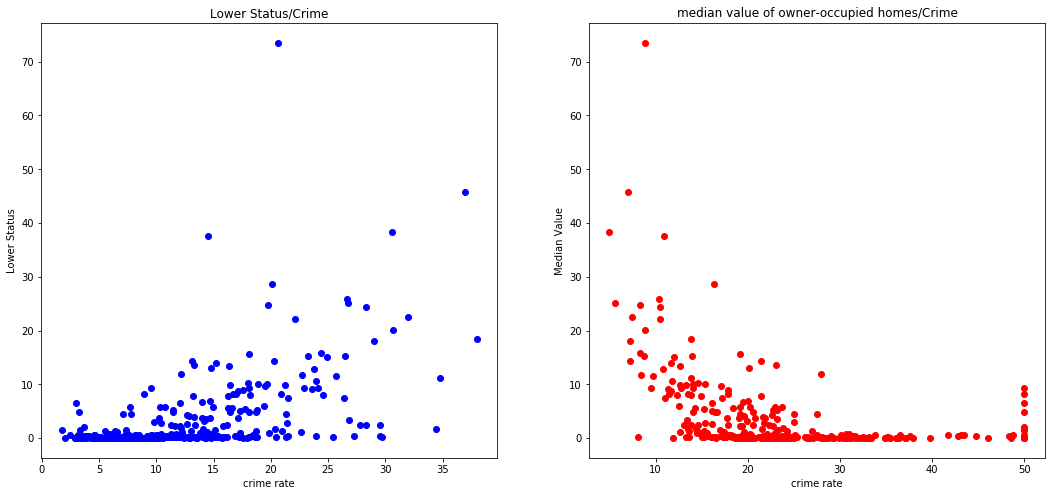

In [29]:
fig = plt.figure(figsize=[18, 8])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df['lstat'],df['crim'], color='blue', marker='o')
ax1.set_ylabel('Lower Status')
ax1.set_xlabel('crime rate')
ax1.set_title('Lower Status/Crime')

ax2.scatter(df['medv'],df['crim'], color='red')
ax2.set_ylabel('Median Value')
ax2.set_xlabel('crime rate')
ax2.set_title('median value of owner-occupied homes/Crime')

plt.show()

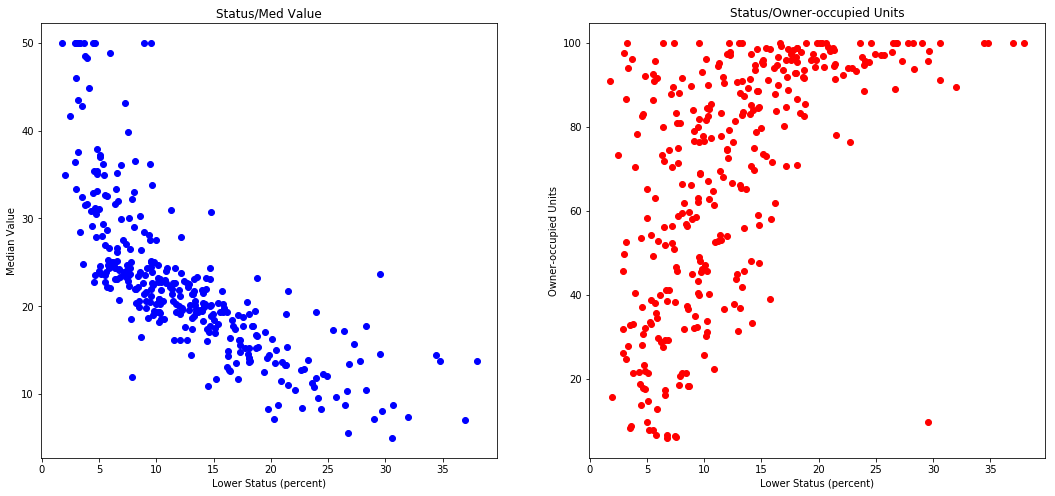

In [20]:
fig = plt.figure(figsize=[18, 8])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(df['lstat'],df['medv'], color='blue', marker='o')
ax1.set_xlabel('Lower Status (percent)')
ax1.set_ylabel('Median Value')
ax1.set_title('Status/Med Value')

ax2.scatter(df['lstat'],df['age'], color='red')
ax2.set_xlabel('Lower Status (percent)')
ax2.set_ylabel('Owner-occupied Units')
ax2.set_title('Status/Owner-occupied Units')
plt.show()

Comment: 

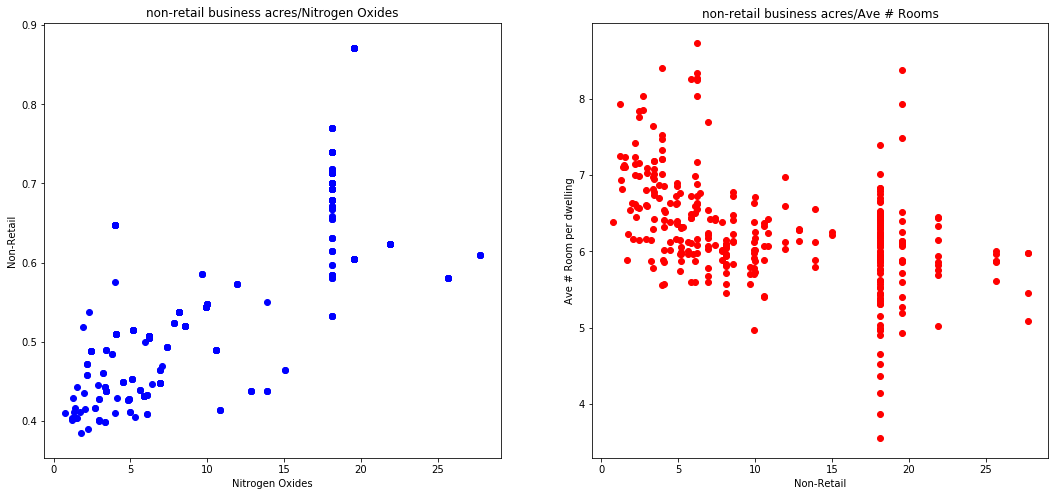

In [25]:
fig = plt.figure(figsize=[18, 8])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df['indus'],df['nox'], color='blue', marker='o')
ax1.set_ylabel('Non-Retail')
ax1.set_xlabel('Nitrogen Oxides')
ax1.set_title('non-retail business acres/Nitrogen Oxides')

ax2.scatter(df['indus'],df['rm'], color='red')
ax2.set_xlabel('Non-Retail')
ax2.set_ylabel('Ave # Room per dwelling')
ax2.set_title('non-retail business acres/Ave # Rooms')

plt.show()

In [ ]:
Comment: 

In [27]:
at_river = df.loc[df['chas'] == 1]
print(at_river)

      ID     crim    zn  indus  chas     nox     rm    age     dis  rad  tax  \
97   143  3.32105   0.0  19.58     1  0.8710  5.403  100.0  1.3216    5  403   
104  155  1.41385   0.0  19.58     1  0.8710  6.129   96.0  1.7494    5  403   
108  161  1.27346   0.0  19.58     1  0.6050  6.250   92.6  1.7984    5  403   
110  164  1.51902   0.0  19.58     1  0.6050  8.375   93.9  2.1620    5  403   
145  209  0.13587   0.0  10.59     1  0.4890  6.064   59.1  4.2392    4  277   
146  212  0.37578   0.0  10.59     1  0.4890  5.404   88.6  3.6650    4  277   
149  217  0.04560   0.0  13.89     1  0.5500  5.888   56.0  3.1121    5  276   
150  222  0.40771   0.0   6.20     1  0.5070  6.164   91.3  3.0480    8  307   
151  223  0.62356   0.0   6.20     1  0.5070  6.879   77.7  3.2721    8  307   
161  235  0.44791   0.0   6.20     1  0.5070  6.726   66.5  3.6519    8  307   
163  237  0.52058   0.0   6.20     1  0.5070  6.631   76.5  4.1480    8  307   
184  274  0.22188  20.0   6.96     1  0.

In [30]:
away_river = df.loc[df['chas'] == 0]
print(away_river)

      ID      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0      1   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1      2   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2      4   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
3      5   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
4      7   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
5     11   0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
6     12   0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
7     13   0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311   
8     14   0.62976   0.0   8.14     0  0.538  5.949   61.8  4.7075    4  307   
9     15   0.63796   0.0   8.14     0  0.538  6.096   84.5  4.4619    4  307   
10    16   0.62739   0.0   8.14     0  0.538  5.834   56.5  4.4986    4  307   
11    17   1.05393   0.0   8.14     0  0

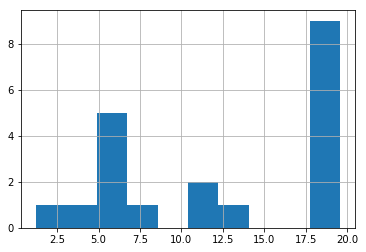

In [31]:
at_river.indus.hist()

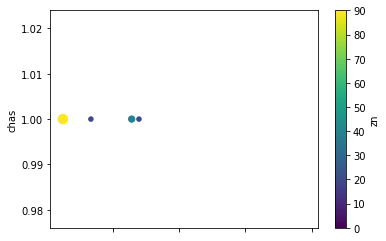

In [34]:
at_river.plot.scatter('indus', 'chas', c='zn', s= at_river['zn'], colormap = 'viridis')

Text(0.5, 1.0, 'Average Home Values by Home Age')

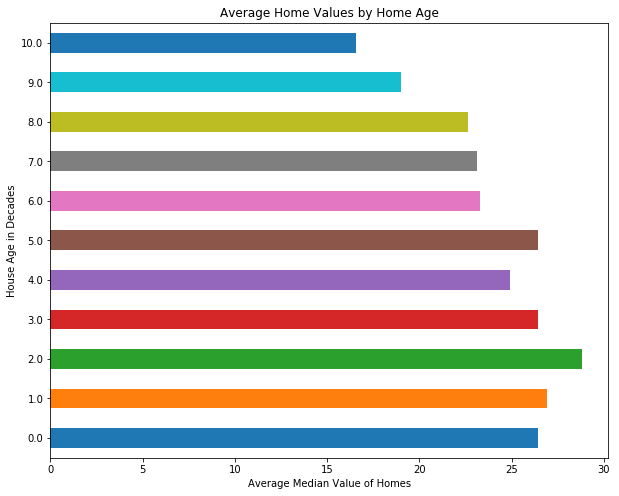

In [35]:
df['decades'] = df.age // 10
to_plot = df.groupby('decades').medv.mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Ave Median Value of Homes')
plt.title('Ave Home Value by Age')

Comment: I like the colors ;-)

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!